In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, consumer_secret,
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Create list to store each tweet
twitter_list = []

In [5]:
# List of news source to extract tweets from
sources = ['@CNN', '@CBS', '@BBC', '@FoxNews', '@nytimes']

# Get 100 tweets for each news source
for source in sources:
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(source, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            text = tweet['text']
            time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet['text'])

            # Store each component of Vader Analysis in temp variable
            comp_score = results['compound']
            pos_score = results['pos']
            neu_score = results['neu']
            neg_score = results['neg']

            # Append a dictionary containing information about current tweet to our main list
            twitter_list.append({'source': source, 'tweet': text, 'created_at': time, 
                                 'compound': comp_score, 'positive': pos_score,
                                 'neutral': neu_score, 'negative': neg_score})

In [6]:
# Examine first 5 tweets of list
twitter_list[:5]

[{'source': '@CNN',
  'tweet': "Rep. Ron DeSantis will win Florida's Republican governor's primary, CNN projects, in yet another win for a Trump-ba… https://t.co/5pJqz1Y3ro",
  'created_at': datetime.datetime(2018, 8, 29, 0, 14, 50, tzinfo=datetime.timezone.utc),
  'compound': 0.8225,
  'positive': 0.322,
  'neutral': 0.678,
  'negative': 0.0},
 {'source': '@CNN',
  'tweet': 'The former CEO of Barnes &amp; Noble is suing the bookseller over his firing last month https://t.co/9saAEwKexu https://t.co/50mk7FweBe',
  'created_at': datetime.datetime(2018, 8, 29, 0, 11, 4, tzinfo=datetime.timezone.utc),
  'compound': -0.128,
  'positive': 0.133,
  'neutral': 0.667,
  'negative': 0.2},
 {'source': '@CNN',
  'tweet': "RT @OutFrontCNN: Sen. Mark Warner says his former Senate colleague John McCain told him 'to stick at it and get to the truth' in the Russia…",
  'created_at': datetime.datetime(2018, 8, 29, 0, 4, 35, tzinfo=datetime.timezone.utc),
  'compound': 0.3182,
  'positive': 0.084,
  'neu

In [34]:
# Create a df from list of tweets 
# Each row is a separate tweet
tweet_df = pd.DataFrame(twitter_list)
tweet_df.head()

,compound,created_at,negative,neutral,positive,source,tweet
0,0.8225,2018-08-29 00:14:50+00:00,0.000,0.678,0.322,@CNN,Rep. Ron DeSantis will win Florida's Republica...
1,-0.1280,2018-08-29 00:11:04+00:00,0.200,0.667,0.133,@CNN,The former CEO of Barnes &amp; Noble is suing ...
2,0.3182,2018-08-29 00:04:35+00:00,0.000,0.916,0.084,@CNN,RT @OutFrontCNN: Sen. Mark Warner says his for...
3,0.0000,2018-08-29 00:01:05+00:00,0.000,1.000,0.000,@CNN,A tale of two refugee girls | By Angelina Joli...
4,-0.4767,2018-08-28 23:51:03+00:00,0.147,0.853,0.000,@CNN,Former Papa John's chairman John Schnatter say...


In [35]:
# Check that there are 500 tweets (100 per news source)
tweet_df.count()

compound      500
created_at    500
negative      500
neutral       500
positive      500
source        500
tweet         500
dtype: int64

In [36]:
# reorganize df
tweet_df = tweet_df[['tweet', 'source', 'created_at', 'compound', 'positive', 'neutral', 'negative']]
tweet_df.head()

,tweet,source,created_at,compound,positive,neutral,negative
0,Rep. Ron DeSantis will win Florida's Republica...,@CNN,2018-08-29 00:14:50+00:00,0.8225,0.322,0.678,0.000
1,The former CEO of Barnes &amp; Noble is suing ...,@CNN,2018-08-29 00:11:04+00:00,-0.1280,0.133,0.667,0.200
2,RT @OutFrontCNN: Sen. Mark Warner says his for...,@CNN,2018-08-29 00:04:35+00:00,0.3182,0.084,0.916,0.000
3,A tale of two refugee girls | By Angelina Joli...,@CNN,2018-08-29 00:01:05+00:00,0.0000,0.000,1.000,0.000
4,Former Papa John's chairman John Schnatter say...,@CNN,2018-08-28 23:51:03+00:00,-0.4767,0.000,0.853,0.147


In [38]:
# Sort by source and date to get latest tweets at top
tweet_df = tweet_df.sort_values(['source', 'created_at'], ascending=False).reset_index()
del tweet_df['index']
tweet_df.head()

,tweet,source,created_at,compound,positive,neutral,negative
0,"Ron DeSantis, a once-little known conservative...",@nytimes,2018-08-29 00:11:02+00:00,0.0000,0.000,1.000,0.000
1,Florida primary election live results\nhttps:/...,@nytimes,2018-08-29 00:02:04+00:00,0.0000,0.000,1.000,0.000
2,“She had a smile on her face. She looked at pe...,@nytimes,2018-08-28 23:51:02+00:00,0.3612,0.111,0.889,0.000
3,RT @joshbarone: Three male principal dancers a...,@nytimes,2018-08-28 23:41:02+00:00,-0.2500,0.000,0.909,0.091
4,Peter Polansky may be tennis’s luckiest loser....,@nytimes,2018-08-28 23:32:06+00:00,-0.2023,0.132,0.676,0.193


In [39]:
# Convert df to csv
tweet_df.to_csv('recent_news_tweets.csv')

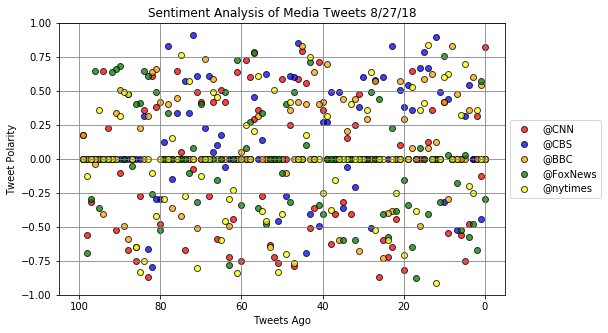

In [44]:
# Choose different color for each news source
colors = ['red', 'blue', 'orange', 'green', 'yellow']

# Change size of plot
plt.figure(figsize=(8,5))

# x variable keeps track of location in 'colors' list
x = 0
# Add points to the scatter plot for each news source
for source in sources:
    plt.scatter(np.arange(0,100), tweet_df.loc[tweet_df['source']==source,:]['compound'], color=colors[x], alpha=0.75, edgecolors='black', label=source)
    x += 1
    
plt.grid(color='gray')
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(105, -5)
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Media Tweets 8/27/18")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('graphs/scatter.png')

In [45]:
# Group df by source to get average polarity scores
tweet_group = tweet_df.groupby(['source']).mean().reset_index()
tweet_group

,source,compound,positive,neutral,negative
0,@BBC,0.106859,0.08151,0.88149,0.03702
1,@CBS,0.126417,0.07962,0.88855,0.03183
2,@CNN,-0.048897,0.06694,0.84861,0.08445
3,@FoxNews,-0.003762,0.06435,0.86349,0.07214
4,@nytimes,-0.021081,0.05911,0.87208,0.06885


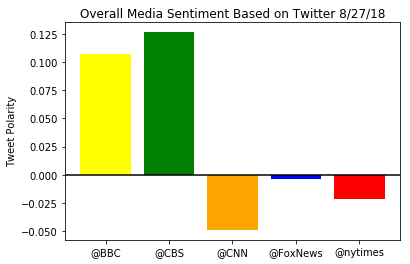

In [47]:
colors = ['yellow', 'green', 'orange', 'blue', 'red']

plt.bar(tweet_group['source'], tweet_group['compound'], color=colors)
plt.ylabel("Tweet Polarity")
plt.axhline(y=0, color='black')
plt.title("Overall Media Sentiment Based on Twitter 8/27/18")
plt.savefig('graphs/bar.png')